### EDA
* Provide summary statistics for each dataset
    * Analyze time span with majority of data
* Plot time series data for relevant datasets
* Calculate standard metrics and distribution for time series data
* Find correlations between variables across datasets
    * Socioeconomic indicators & obesity rates
    * Socioeconomic indicators & processed food stocks vs socioeconomic indicators & ETFs (might be opposite correlation)
    * Meat Production & obesity rates
    * Sugar/Coffee prices & obesity rates

### Possibly relevant (wrt "living" costs) time series data to consider plotting or analyzing correlations between
* ECONOMICS: Perhaps group by US region (South, Atlantic, Midwest, West) (yearly)
    * Median household income: annual 2010 - 2022
    * Employment rate: annual 2010 - 2022  
* MEAT: For characteristic in {production, count, storage} (monthly):
    * Unit count for each type of animal (Beef, Veal, Pork, Lamb & Mutton, etc.)  
* OBESITY/PHYSICAL: See EDA to get categories of data (Note it is yearly)
    * Gather data on each region wrt obesity rate, amount of physical activity, nutrition, etc.
* STOCKS (daily): 
    * Weighted average of % increase based on market cap of each stock (market cap = stock price * trade volume)
    * Probably should average out to get monthly or yearly yield returns  
* COMMODITIES (monthly):
    * Price for Coffee and Sugar

In [266]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# ECONOMICS

In [267]:
data_path = "./datasets/acs_5yr_est_selected_economic_characteristics_2010-2022.csv"
df = pd.read_csv(data_path)

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98020 entries, 0 to 98019
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Label (Grouping)         98020 non-null  object
 1   Category                 98020 non-null  object
 2   State                    98020 non-null  object
 3   Estimate                 92612 non-null  object
 4   Margin of Error          92612 non-null  object
 5   Percent                  92612 non-null  object
 6   Percent Margin of Error  92612 non-null  object
 7   Year                     98020 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 6.0+ MB
None

Summary Statistics:
               Year
count  98020.000000
mean    2016.000000
std        3.741676
min     2010.000000
25%     2013.000000
50%     2016.000000
75%     2019.000000
max     2022.000000

Missing Values:
Label (Grouping)              0
Category                      0
State      

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
0,EMPLOYMENT STATUS,Header,Alabama,NaN,NaN,NaN,NaN,2010
1,Population 16 years and over,EMPLOYMENT STATUS,Alabama,"3,714,504","±1,588","3,714,504",(X),2010
2,In labor force,EMPLOYMENT STATUS,Alabama,"2,246,848","±5,576",60.5%,±0.1,2010
3,Civilian labor force,EMPLOYMENT STATUS,Alabama,"2,230,879","±5,531",60.1%,±0.1,2010
4,Employed,EMPLOYMENT STATUS,Alabama,"2,036,867","±5,904",54.8%,±0.2,2010


In [268]:
# Clean dataset to remove unnecessary columns and rows

# Replace (X) with NaN for whole dataframe
df = df.replace('(X)', np.nan)

# Convert the Estimate column to float
# df = df.dropna(subset=['Estimate'])
print(len(df['Label (Grouping)'].unique()))
df['Estimate'] = df['Estimate'].astype(str).str.replace(',', '').astype(float)

# Strip leading invisible characters from Label column
df['Label (Grouping)'] = df['Label (Grouping)'].str.lstrip()

print(df['Category'].unique())
df['Estimate']

208
['Header' 'EMPLOYMENT STATUS' 'COMMUTING TO WORK' 'OCCUPATION' 'INDUSTRY'
 'CLASS OF WORKER'
 'INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS)'
 'HEALTH INSURANCE COVERAGE'
 'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL'
 'INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)'
 'INCOME AND BENEFITS (IN 2013 INFLATION-ADJUSTED DOLLARS)'
 'INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS)'
 'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)'
 'INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS)'
 'INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)'
 'INCOME AND BENEFITS (IN 2014 INFLATION-ADJUSTED DOLLARS)'
 'INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)'
 'INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)'
 'INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)'
 'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS)'
 'INCOME AND BENEFITS (IN 2021 INFLATION-ADJUSTED DOLLA

0              NaN
1        3714504.0
2        2246848.0
3        2230879.0
4        2036867.0
           ...    
98015          NaN
98016          NaN
98017          NaN
98018          NaN
98019          NaN
Name: Estimate, Length: 98020, dtype: float64

In [269]:
Midwest = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']
South = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'Washington D.C.', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
West = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
East = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']

In [270]:
# Create sub-dataframes for each region and analyze them
regions = {
    'Midwest': Midwest,
    'South': South,
    'West': West,
    'East': East
}

all_regions_df = pd.DataFrame()

for region_name, states in regions.items():
    print(f"\n{'='*50}")
    print(f"{region_name} Region Analysis")
    print(f"{'='*50}")
    
    # Create sub-dataframe for the region
    region_df = df[df['State'].isin(states)]
    
    # Filter for median household income and Population 16 years and over in labor force
    region_df = region_df[
        ((region_df['Label (Grouping)'].str.contains('Percent Unemployed')) & (region_df['Category'] == 'EMPLOYMENT STATUS')) |
        ((region_df['Label (Grouping)'].str.contains('Unemployment Rate')) & (region_df['Category'] == 'EMPLOYMENT STATUS')) |
        ((region_df['Label (Grouping)'] == 'Median household income (dollars)')) |
        ((region_df['Label (Grouping)'].str.contains('All people')) & (region_df['Category'] == 'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL'))
    ]
    region_df['Percent'] = region_df['Percent'].str.rstrip('%').astype('float')

    # Split region_df into three different dataframes
    unemployed_df = region_df[region_df['Label (Grouping)'].str.contains('Percent Unemployed') | region_df['Label (Grouping)'].str.contains('Unemployment Rate')]
    income_df = region_df[region_df['Label (Grouping)'] == 'Median household income (dollars)']
    poverty_df = region_df[region_df['Label (Grouping)'].str.contains('All people')]

    # Rename columns for clarity
    unemployed_df = unemployed_df.rename(columns={'Percent': 'Unemployment Rate'})
    income_df = income_df.rename(columns={'Estimate': 'Median Household Income'})
    poverty_df = poverty_df.rename(columns={'Percent': 'Poverty Rate'})

    print(len(unemployed_df), len(income_df), len(poverty_df))

    # Print information about each dataframe
    print(f"\nUnemployment Data for {region_name}:")
    print(unemployed_df[['State', 'Unemployment Rate', 'Year']])
    print(unemployed_df['Year'].unique())

    print(f"\nMedian Household Income Data for {region_name}:")
    print(income_df[['State', 'Median Household Income', 'Year']])

    print(f"\nPoverty Rate Data for {region_name}:")
    print(poverty_df[['State', 'Poverty Rate', 'Year']])

    # Reassign region_df to include all three dataframes
    region_df = pd.concat([unemployed_df, income_df, poverty_df])
    
    # Add Region column
    region_df['Region'] = region_name
    
    # Append to all_regions_df
    all_regions_df = pd.concat([all_regions_df, region_df], ignore_index=True)
    
    # Display basic information about the dataset
    print(region_df.head())
    print("\nDataset Info:")
    region_df.info()
    
    # Display summary statistics
    print("\nSummary Statistics:")
    print(region_df.describe())
    
    # Check for missing values
    print("\nMissing Values:")
    print(region_df.isnull().sum())
    
    print(f"\nShape of {region_name} dataframe:", region_df.shape)

# Save the combined dataframe for later use
print("\nAll Regions Combined Dataset Info:")
all_regions_df.drop(['Percent', 'Estimate'], axis=1, inplace=True)
all_regions_df.info()
print("\nShape of all_regions_df:", all_regions_df.shape)


Midwest Region Analysis
156 156 156

Unemployment Data for Midwest:
              State  Unemployment Rate  Year
1894       Illinois                8.6  2010
2039        Indiana                8.4  2010
2184           Iowa                5.3  2010
2329         Kansas                6.0  2010
3199       Michigan               11.5  2010
...             ...                ...   ...
94404      Nebraska                3.3  2021
95419  North Dakota                3.2  2021
95564          Ohio                5.3  2021
96434  South Dakota                3.2  2021
97594     Wisconsin                3.5  2021

[156 rows x 3 columns]
[2010 2011 2013 2012 2016 2017 2015 2014 2019 2018 2022 2020 2021]

Median Household Income Data for Midwest:
              State  Median Household Income  Year
1952       Illinois                  55735.0  2010
2097        Indiana                  47697.0  2010
2242           Iowa                  48872.0  2010
2387         Kansas                  49424.0  2010
32

       Estimate  Unemployment Rate         Year  Median Household Income  \
count       0.0         156.000000   468.000000               156.000000   
mean        NaN           5.822436  2016.000000             56837.775641   
std         NaN           2.260476     3.745661              7675.740561   
min         NaN           2.700000  2010.000000             46262.000000   
25%         NaN           4.000000  2013.000000             50689.750000   
50%         NaN           5.400000  2016.000000             55528.000000   
75%         NaN           7.100000  2019.000000             61452.250000   
max         NaN          12.700000  2022.000000             84313.000000   

       Percent  Poverty Rate  
count      0.0    156.000000  
mean       NaN     12.929487  
std        NaN      1.684319  
min        NaN      9.200000  
25%        NaN     11.675000  
50%        NaN     12.800000  
75%        NaN     14.100000  
max        NaN     16.900000  

Missing Values:
Label (Grouping)   

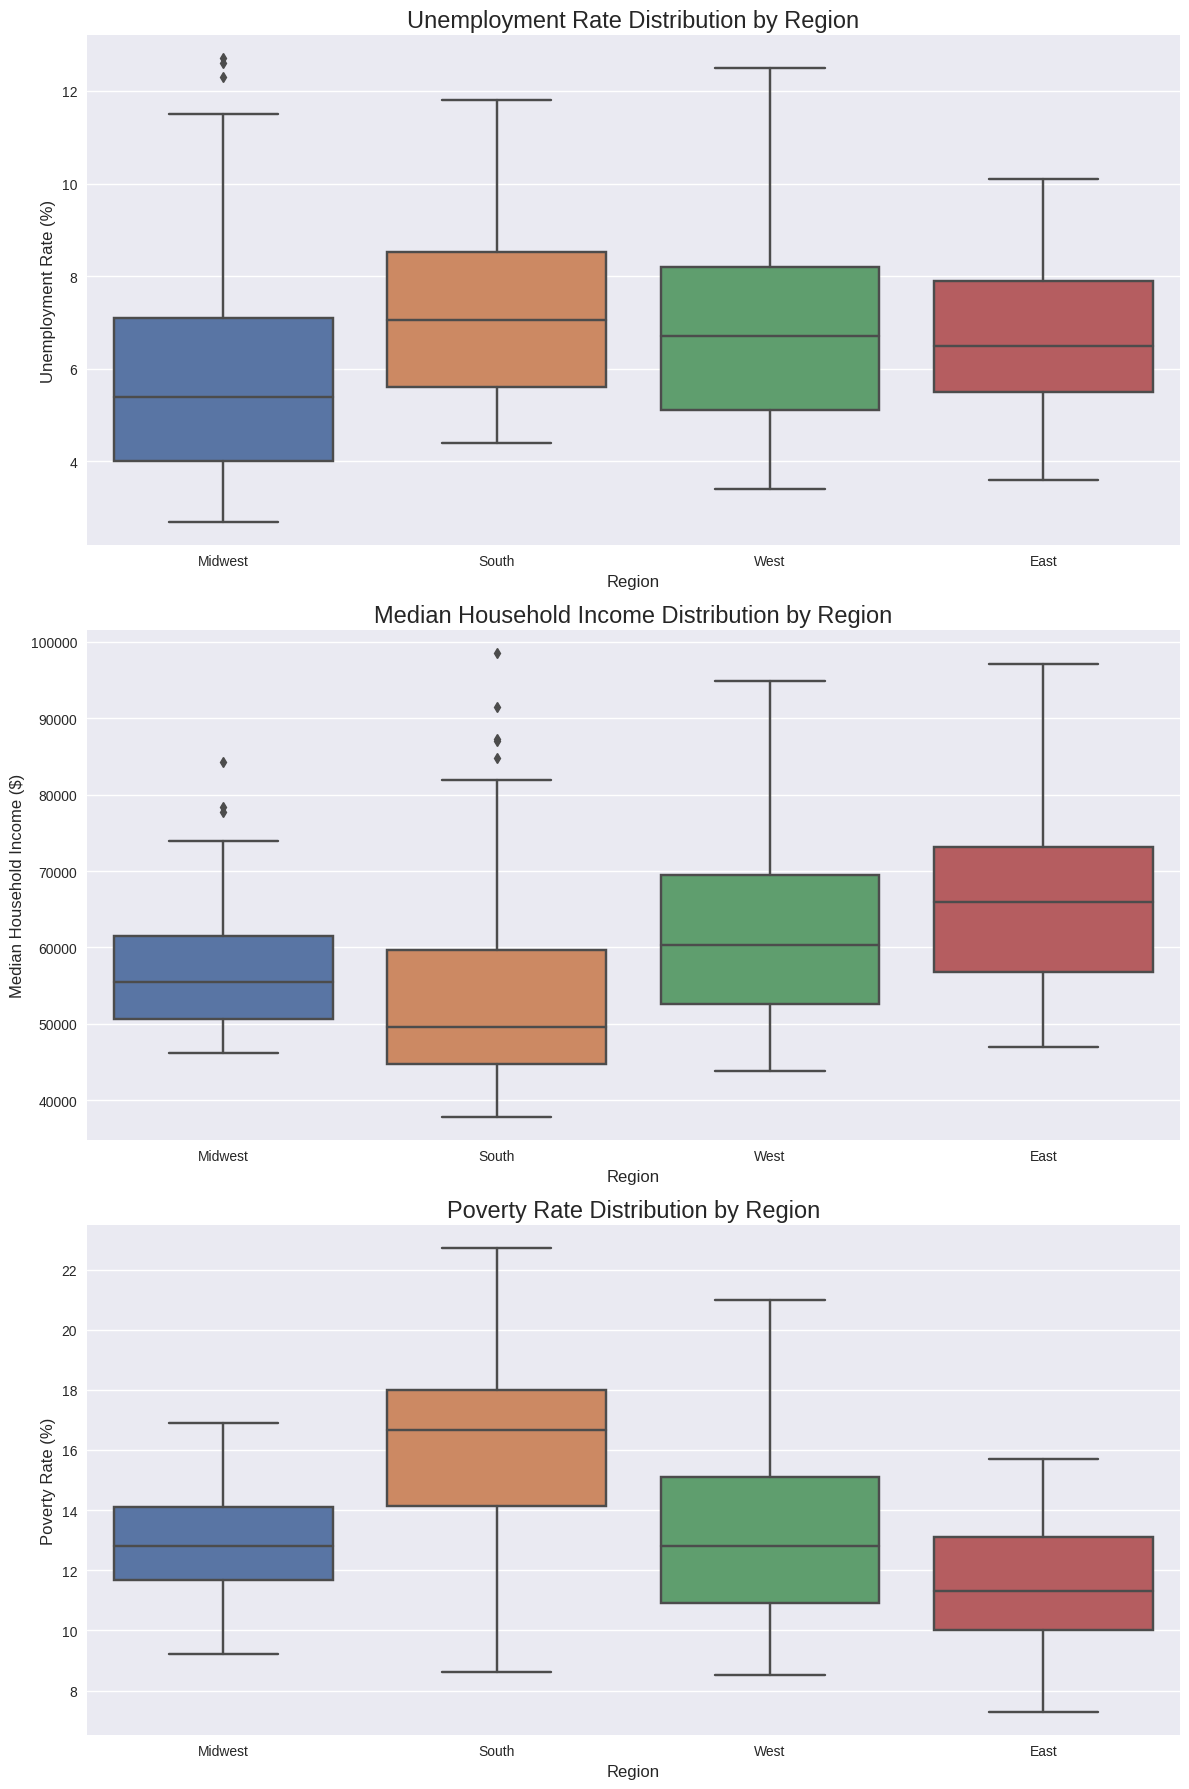

In [271]:
# Create box plots for Unemployment Rate, Median Household Income, and Poverty Rate by Region

# Set up the plotting style
plt.style.use('seaborn')
sns.set_palette("deep")

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

# Box plot for Unemployment Rate
sns.boxplot(x='Region', y='Unemployment Rate', data=all_regions_df, ax=ax1)
ax1.set_title('Unemployment Rate Distribution by Region', fontsize=17)
ax1.set_xlabel('Region', fontsize=12)
ax1.set_ylabel('Unemployment Rate (%)', fontsize=12)

# Box plot for Median Household Income
sns.boxplot(x='Region', y='Median Household Income', data=all_regions_df, ax=ax2)
ax2.set_title('Median Household Income Distribution by Region', fontsize=17)
ax2.set_xlabel('Region', fontsize=12)
ax2.set_ylabel('Median Household Income ($)', fontsize=12)

# Box plot for Poverty Rate
sns.boxplot(x='Region', y='Poverty Rate', data=all_regions_df, ax=ax3)
ax3.set_title('Poverty Rate Distribution by Region', fontsize=17)
ax3.set_xlabel('Region', fontsize=12)
ax3.set_ylabel('Poverty Rate (%)', fontsize=12)

plt.tight_layout()
plt.savefig('./plots/economic_characteristics_boxplots.png')
plt.show()
plt.close()


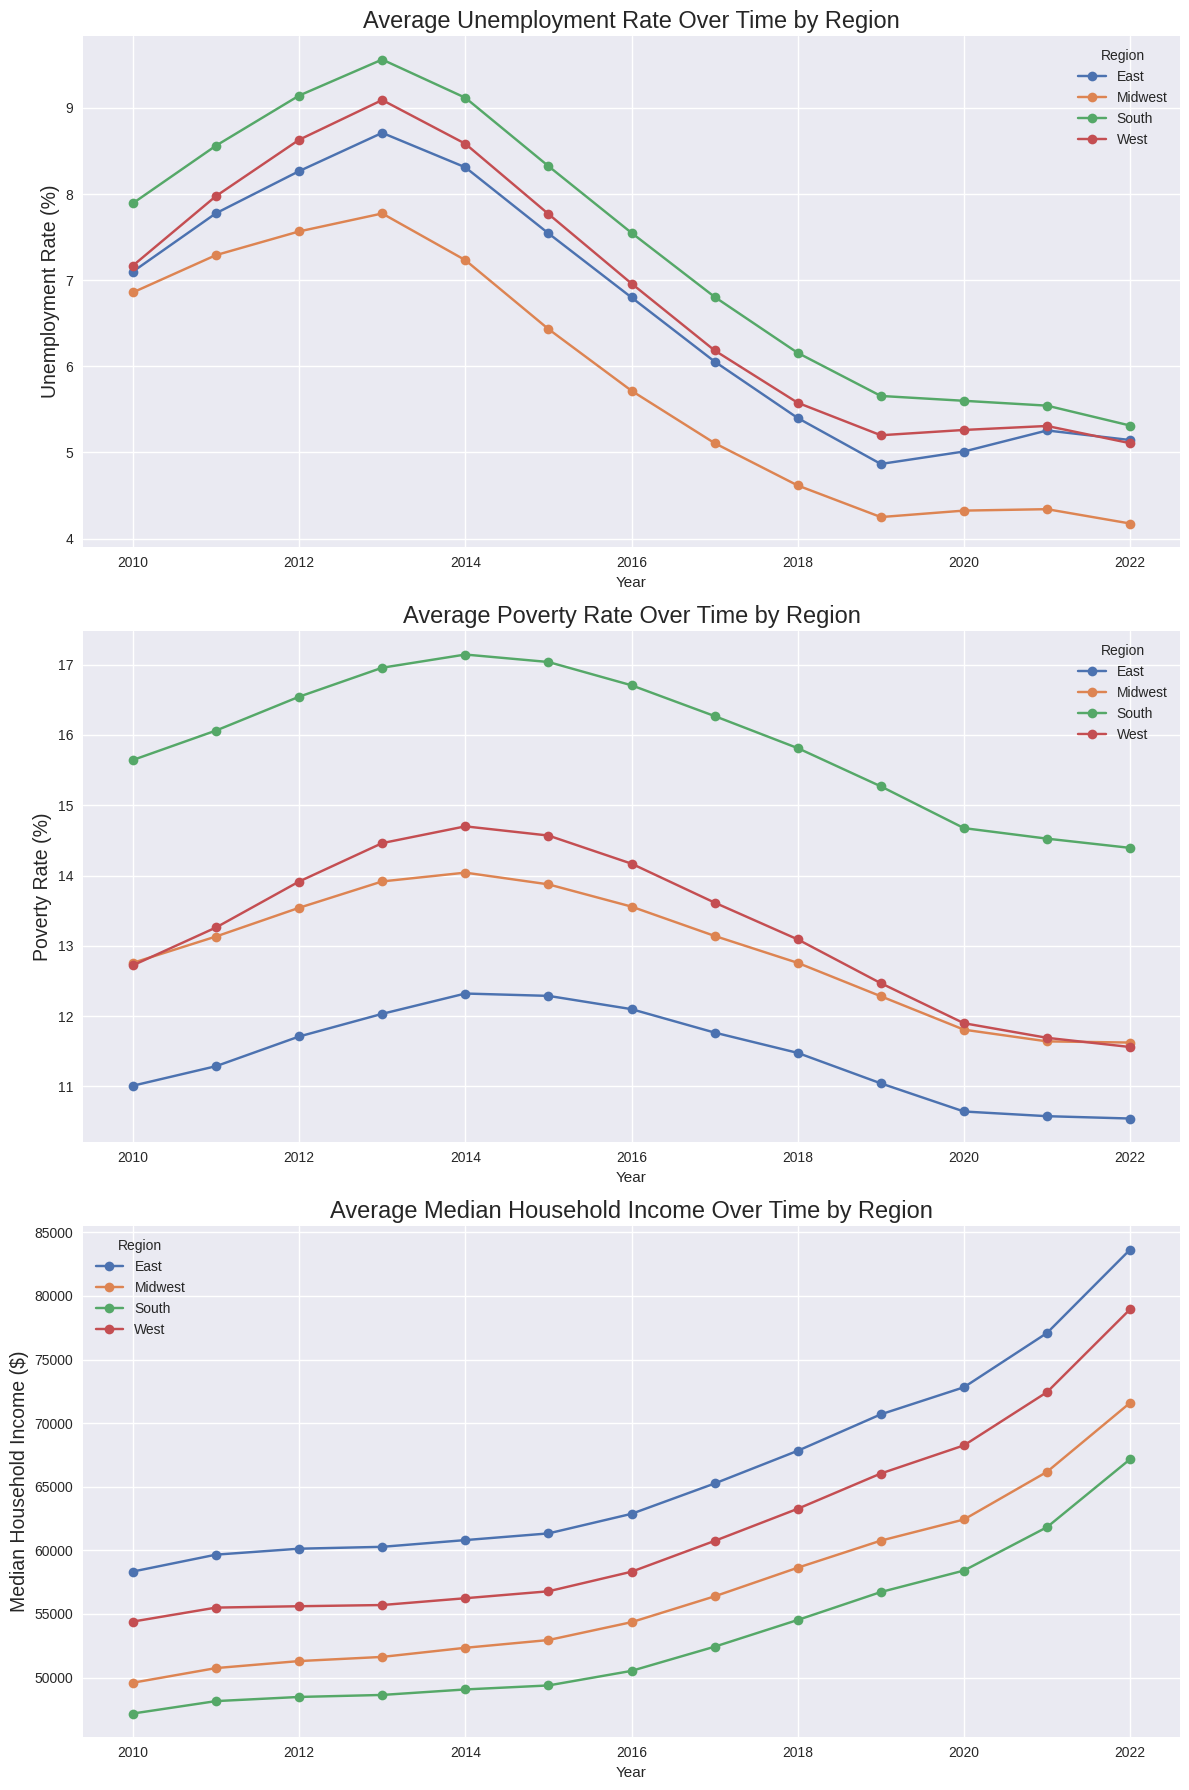

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up the plotting style
plt.style.use('seaborn')
sns.set_palette("deep")

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

# Function to calculate average for each region
def calculate_regional_average(df, column):
    return df.groupby(['Year', 'Region'])[column].mean().unstack()

# Plot Unemployment Rate
unemployment_avg = calculate_regional_average(all_regions_df, 'Unemployment Rate')
unemployment_avg.plot(ax=ax1, marker='o')
ax1.set_title('Average Unemployment Rate Over Time by Region', fontsize=17)
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate (%)', fontsize=14)
ax1.legend(title='Region')

# Plot Poverty Rate
poverty_avg = calculate_regional_average(all_regions_df, 'Poverty Rate')
poverty_avg.plot(ax=ax2, marker='o')
ax2.set_title('Average Poverty Rate Over Time by Region', fontsize=17)
ax2.set_xlabel('Year')
ax2.set_ylabel('Poverty Rate (%)', fontsize=14)
ax2.legend(title='Region')

# Plot Median Household Income
income_avg = calculate_regional_average(all_regions_df, 'Median Household Income')
income_avg.plot(ax=ax3, marker='o')
ax3.set_title('Average Median Household Income Over Time by Region', fontsize=17)
ax3.set_xlabel('Year')
ax3.set_ylabel('Median Household Income ($)', fontsize=14)
ax3.legend(title='Region')

plt.tight_layout()
plt.savefig('./plots/economic_characteristics_graphs.png')
plt.show()
plt.close()

# MEAT

In [273]:
meat_storage = pd.read_csv('./datasets/Meat_Stats_Cold_Storage.csv')
meat_storage['Weight'] = meat_storage['Weight'].astype(str).str.replace(',', '').astype(float)

meat_production = pd.read_csv('./datasets/Meat_Stats_Meat_Production.csv')
meat_production['Production'] = meat_production['Production'].str.replace(',', '').astype(float)

meat_counts = pd.read_csv('./datasets/Meat_Stats_Slaughter_Counts.csv')
meat_counts['Count'] = meat_counts['Count'].str.replace(',', '').astype(float)

meat_weights = pd.read_csv('./datasets/Meat_Stats_Slaughter_Weights.csv')
meat_weights['Weight'] = meat_weights['Weight'].str.replace(',', '').astype(float)

meat_data = [meat_storage, meat_production, meat_counts, meat_weights]
names = ["Storage", "Production", "Counts", "Weights"]

for i in range(4):
    df = meat_data[i]
    print("=" * 50)
    print(f"{names[i]} Dataset")
    print(df.head())

    # Display basic information about the dataset
    print("Dataset Info:")
    df.info()

    # Display summary statistics
    print("\nSummary Statistics:")
    print(df.describe())
    # Compute summary statistics for each animal type
    print("\nSummary Statistics by Animal:")
    for animal in df['Animal'].unique():
        animal_df = df[df['Animal'] == animal]
        
        if 'Commercial_Or_Federally_Inspected' in df.columns:
            # If the column exists, sum values for both types
            animal_df = animal_df.groupby(['Date', 'Year', 'Month', 'Animal']).sum().reset_index()
        
        # Identify the numerical column (not Year or Month)
        num_col = animal_df.select_dtypes(include=[np.number]).columns
        num_col = [col for col in num_col if col not in ['Year', 'Month']][0]
        
        print(f"\n{animal}:")
        print(animal_df[num_col].describe())

    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())


Storage Dataset
       Date  Year  Month            Unit Animal  Weight Type_Of_Meat
0  Dec-2023  2023     12  Million Pounds   Beef  457.41     Red Meat
1  Nov-2023  2023     11  Million Pounds   Beef  445.67     Red Meat
2  Oct-2023  2023     10  Million Pounds   Beef  420.85     Red Meat
3  Sep-2023  2023      9  Million Pounds   Beef  395.40     Red Meat
4  Aug-2023  2023      8  Million Pounds   Beef  410.46     Red Meat
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3936 non-null   object 
 1   Year          3936 non-null   int64  
 2   Month         3936 non-null   int64  
 3   Unit          3936 non-null   object 
 4   Animal        3936 non-null   object 
 5   Weight        3606 non-null   float64
 6   Type_Of_Meat  3936 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 215.4+ KB

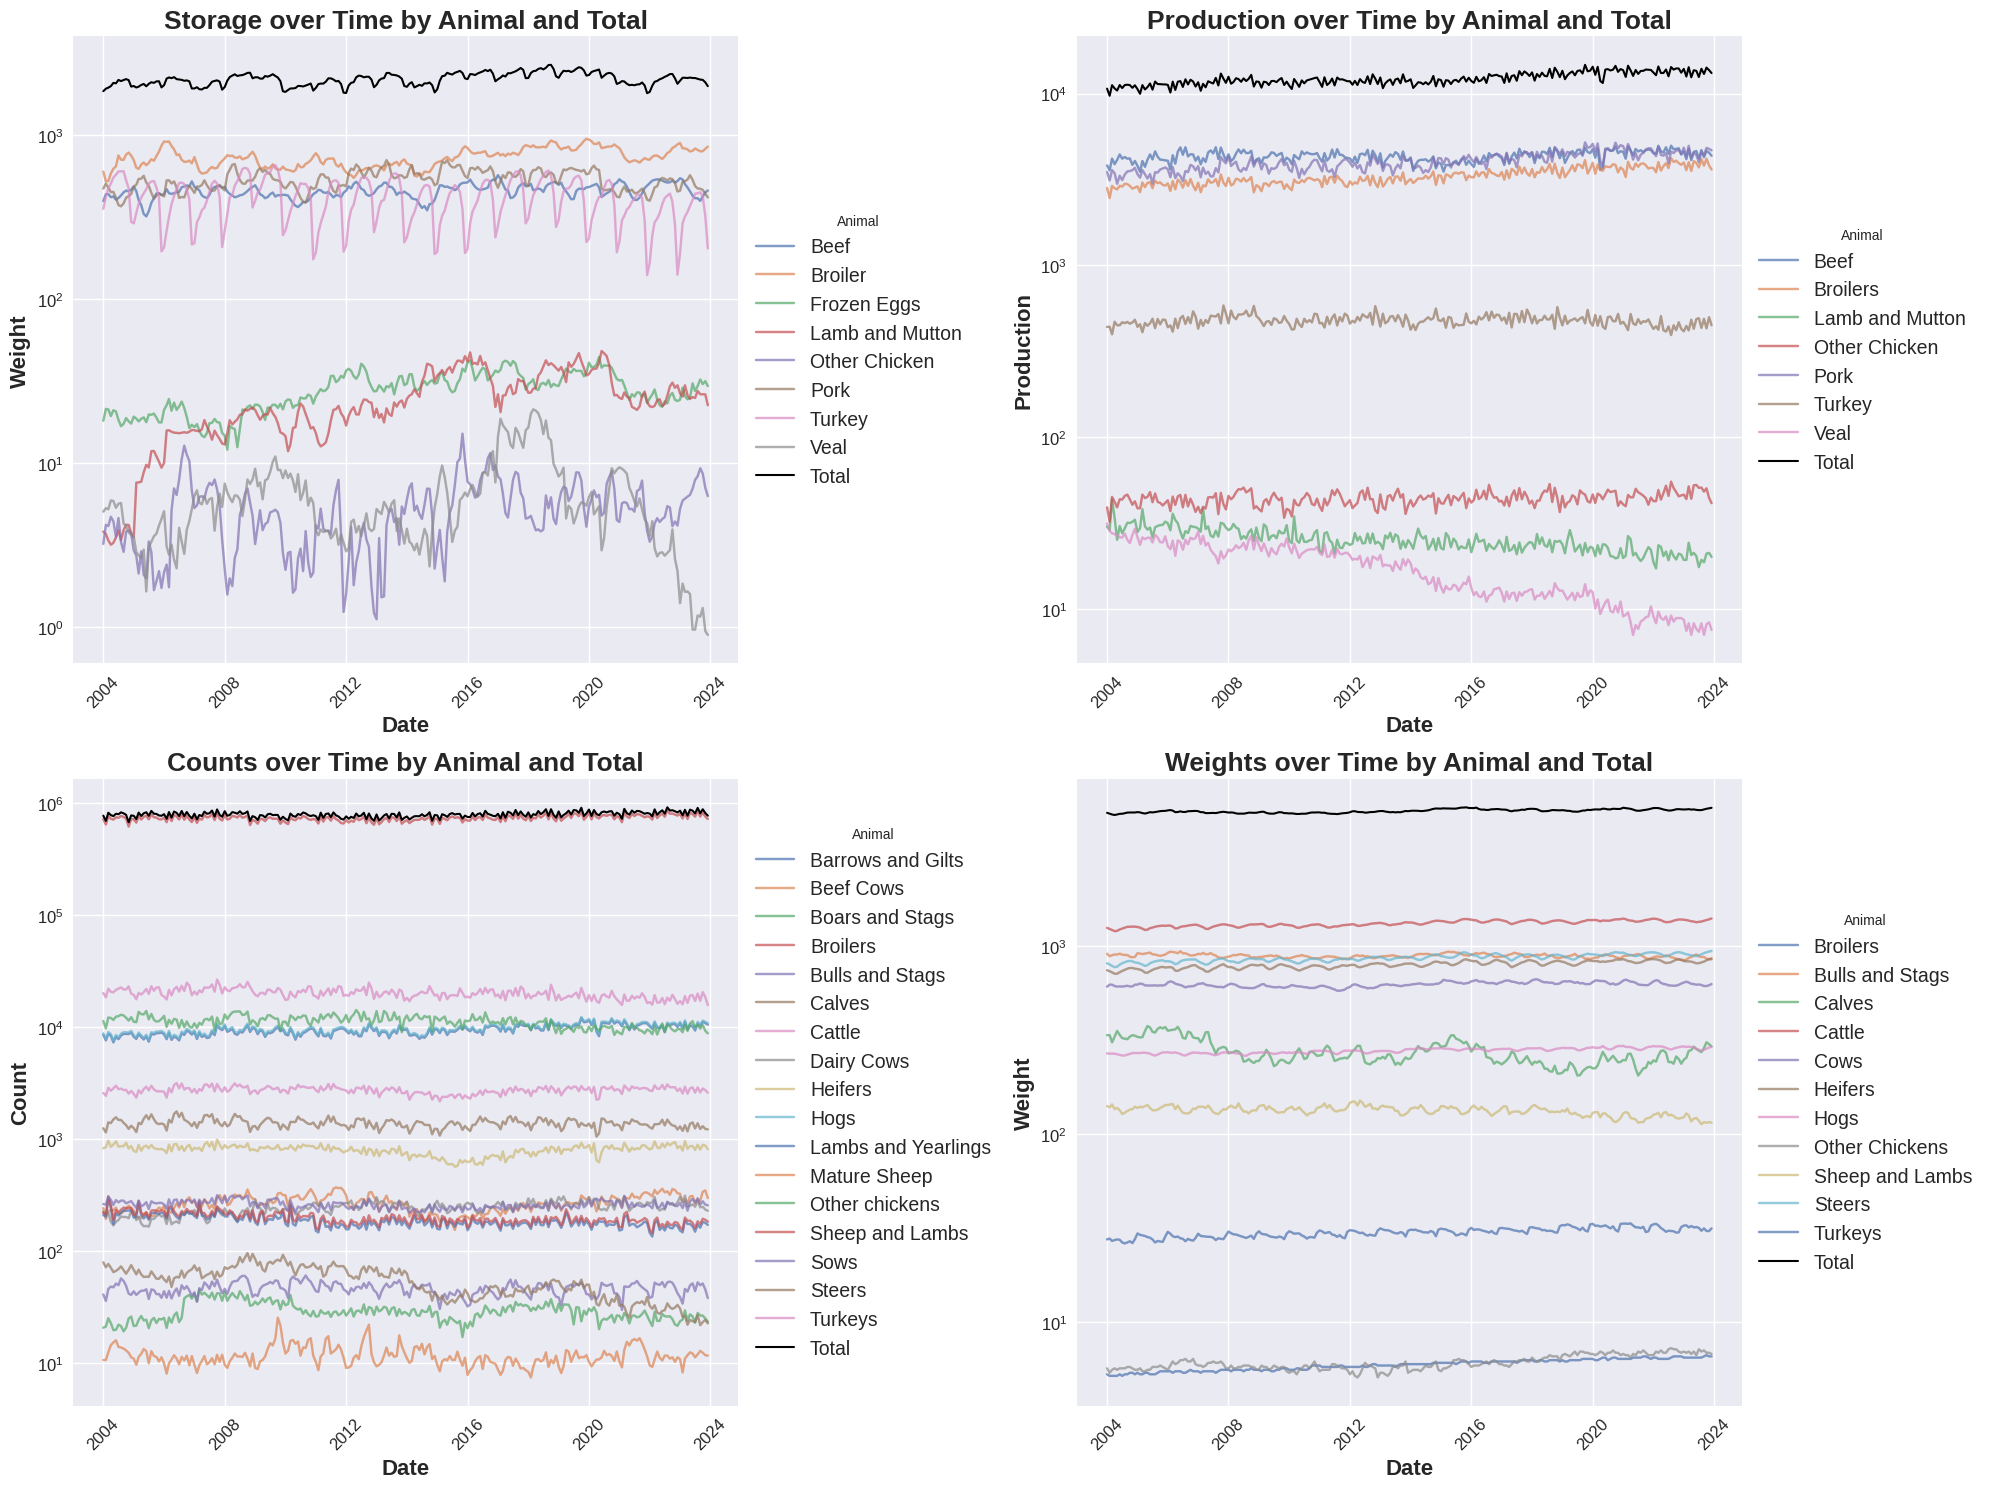

In [274]:
plt.figure(figsize=(20, 15))

production_totals = {}  # Dictionary to store production totals for each dataset

for i, (df, name) in enumerate(zip(meat_data, names), 1):
    plt.subplot(2, 2, i)
    
    # Convert Date to datetime and filter for dates from 2004 onwards
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Date'].dt.year >= 2004]
    
    # Identify the numerical column (not Year or Month)
    num_col = df.select_dtypes(include=[np.number]).columns
    num_col = [col for col in num_col if col not in ['Year', 'Month']][0]
    
    # Group by Date and Animal, summing over 'Commercial or Federally Inspected' if it exists
    if 'Commercial or Federally Inspected' in df.columns:
        grouped = df.groupby(['Date', 'Animal'])[num_col].sum().unstack()
    else:
        grouped = df.groupby(['Date', 'Animal'])[num_col].first().unstack()
    
    # Handle NaN values by filling them with 0 or interpolating
    grouped = grouped.fillna(method='ffill').fillna(0)
    
    # Calculate total over all categories
    grouped['Total'] = grouped.sum(axis=1)
    
    # Store the production totals for this dataset
    production_totals[name] = grouped['Total']
    
    # Plot individual categories
    for animal in grouped.columns:
        if animal != 'Total':
            plt.plot(grouped.index, grouped[animal], label=animal, alpha=0.7)
    
    # Plot total
    plt.plot(grouped.index, grouped['Total'], label='Total', linewidth=1.5, color='black')
    
    plt.title(f'{name} over Time by Animal and Total', fontsize=19, weight='bold')
    plt.xlabel('Date', fontsize=16, weight='bold')
    plt.ylabel(num_col, fontsize=16, weight='bold')
    plt.legend(title='Animal', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
    plt.xticks(rotation=45, fontsize=14)
    plt.yticks(fontsize=14)
    
    # Set y-axis to logarithmic scale
    plt.yscale('log')
    
    # Increase tick label size
    plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.savefig('./plots/meat_data.png')
plt.show()
plt.close()

# Save production totals to a CSV file
production_totals_df = pd.DataFrame(production_totals)

# NUTRITION AND PHYSICAL

In [275]:
health = pd.read_csv('datasets/Nutrition_Physical_Activity_and_Obesity_Data.csv')
print(health.head()['Data_Value'])
print(health['Question'].unique())
print(health['YearStart'].unique())
print(health['YearEnd'].unique())

0     9.6
1    13.3
2    17.1
3    65.9
4    16.7
Name: Data_Value, dtype: float64
['Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily'
 'Percent of students in grades 9-12 who have obesity'
 'Percent of students in grades 9-12 who participate in daily physical education'
 'Percent of students in grades 9-12 who have an overweight classification'
 'Percent of students in grades 9-12 who drank regular soda/pop at least one time per day'
 'Percent of students in grades 9-12 who consume vegetables less than 1 time daily'
 'Percent of students in grades 9-12 who consume fruit less than 1 time daily'
 'Percent of students in grades 9-12 watching 3 or more hours of television each school day'
 'Percent of adults who engage in no leisure-time physical activity'
 'Percent of adults aged 18 years and older who have obesity'
 'Percent of adults aged 18 years and older who have an overweight classification'
 'Percent of adu

/tmp/ipykernel_332510/222829084.py:1: DtypeWarning: Columns (18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  health = pd.read_csv('datasets/Nutrition_Physical_Activity_and_Obesity_Data.csv')


In [276]:
questions = [
    'Percent of adults aged 18 years and older who have obesity',
    'Percent of adults who engage in no leisure-time physical activity',
    'Percent of students in grades 9-12 who have obesity',
    'Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily',
    'Percent of adults who report consuming vegetables less than one time daily',
    'Percent of adults who report consuming fruit less than one time daily'
]

regions = {"Midwest", "South", "West", "East"}

Midwest = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']
South = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'Washington D.C.', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
West = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
East = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']

# Filter for the questions of interest and count entries for each question
health = health[health['Question'].isin(questions)]
health.dropna(subset=['Data_Value'], inplace=True)

for question in questions:
    count = health[health['Question'] == question].shape[0]
    print(f"Entries for '{question}': {count}")

health.info()

Entries for 'Percent of adults aged 18 years and older who have obesity': 16340
Entries for 'Percent of adults who engage in no leisure-time physical activity': 16379
Entries for 'Percent of students in grades 9-12 who have obesity': 4169
Entries for 'Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily': 3000
Entries for 'Percent of adults who report consuming vegetables less than one time daily': 4075
Entries for 'Percent of adults who report consuming fruit less than one time daily': 4080
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48043 entries, 0 to 133344
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   48043 non-null  int64  
 1   YearEnd                     48043 non-null  int64  
 2   LocationAbbr                48043 non-null  object 
 3   LocationDesc                4804

In [277]:
# Create dictionaries to store regional dataframes
regional_dfs = {
    'Midwest': pd.DataFrame(),
    'South': pd.DataFrame(),
    'West': pd.DataFrame(),
    'East': pd.DataFrame()
}

# Function to determine region for a given state
def get_region(state):
    if state in Midwest:
        return 'Midwest'
    elif state in South:
        return 'South'
    elif state in West:
        return 'West'
    elif state in East:
        return 'East'
    else:
        return None

# Add a 'Region' column to the health dataframe
health['Region'] = health['LocationDesc'].apply(get_region)

# Filter and split the dataframe for each region
for region in regional_dfs.keys():
    regional_dfs[region] = health[health['Region'] == region][['YearStart', 'LocationDesc', 'Question', 'Data_Value']]

# Print info for each regional dataframe
for region, df in regional_dfs.items():
    print(f"\n{region} DataFrame:")
    print(df.info())
    print(df.head())
    print("\n" + "="*50)



Midwest DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10643 entries, 7 to 133183
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearStart     10643 non-null  int64  
 1   LocationDesc  10643 non-null  object 
 2   Question      10643 non-null  object 
 3   Data_Value    10643 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 415.7+ KB
None
    YearStart  LocationDesc  \
7        2019      Nebraska   
12       2019  South Dakota   
37       2017  North Dakota   
44       2007      Illinois   
56       2011       Indiana   

                                             Question  Data_Value  
7   Percent of students in grades 9-12 who have ob...        10.3  
12  Percent of students in grades 9-12 who have ob...        17.0  
37  Percent of students in grades 9-12 who have ob...        14.9  
44  Percent of students in grades 9-12 who have ob...        11.5  
56  Percent of st

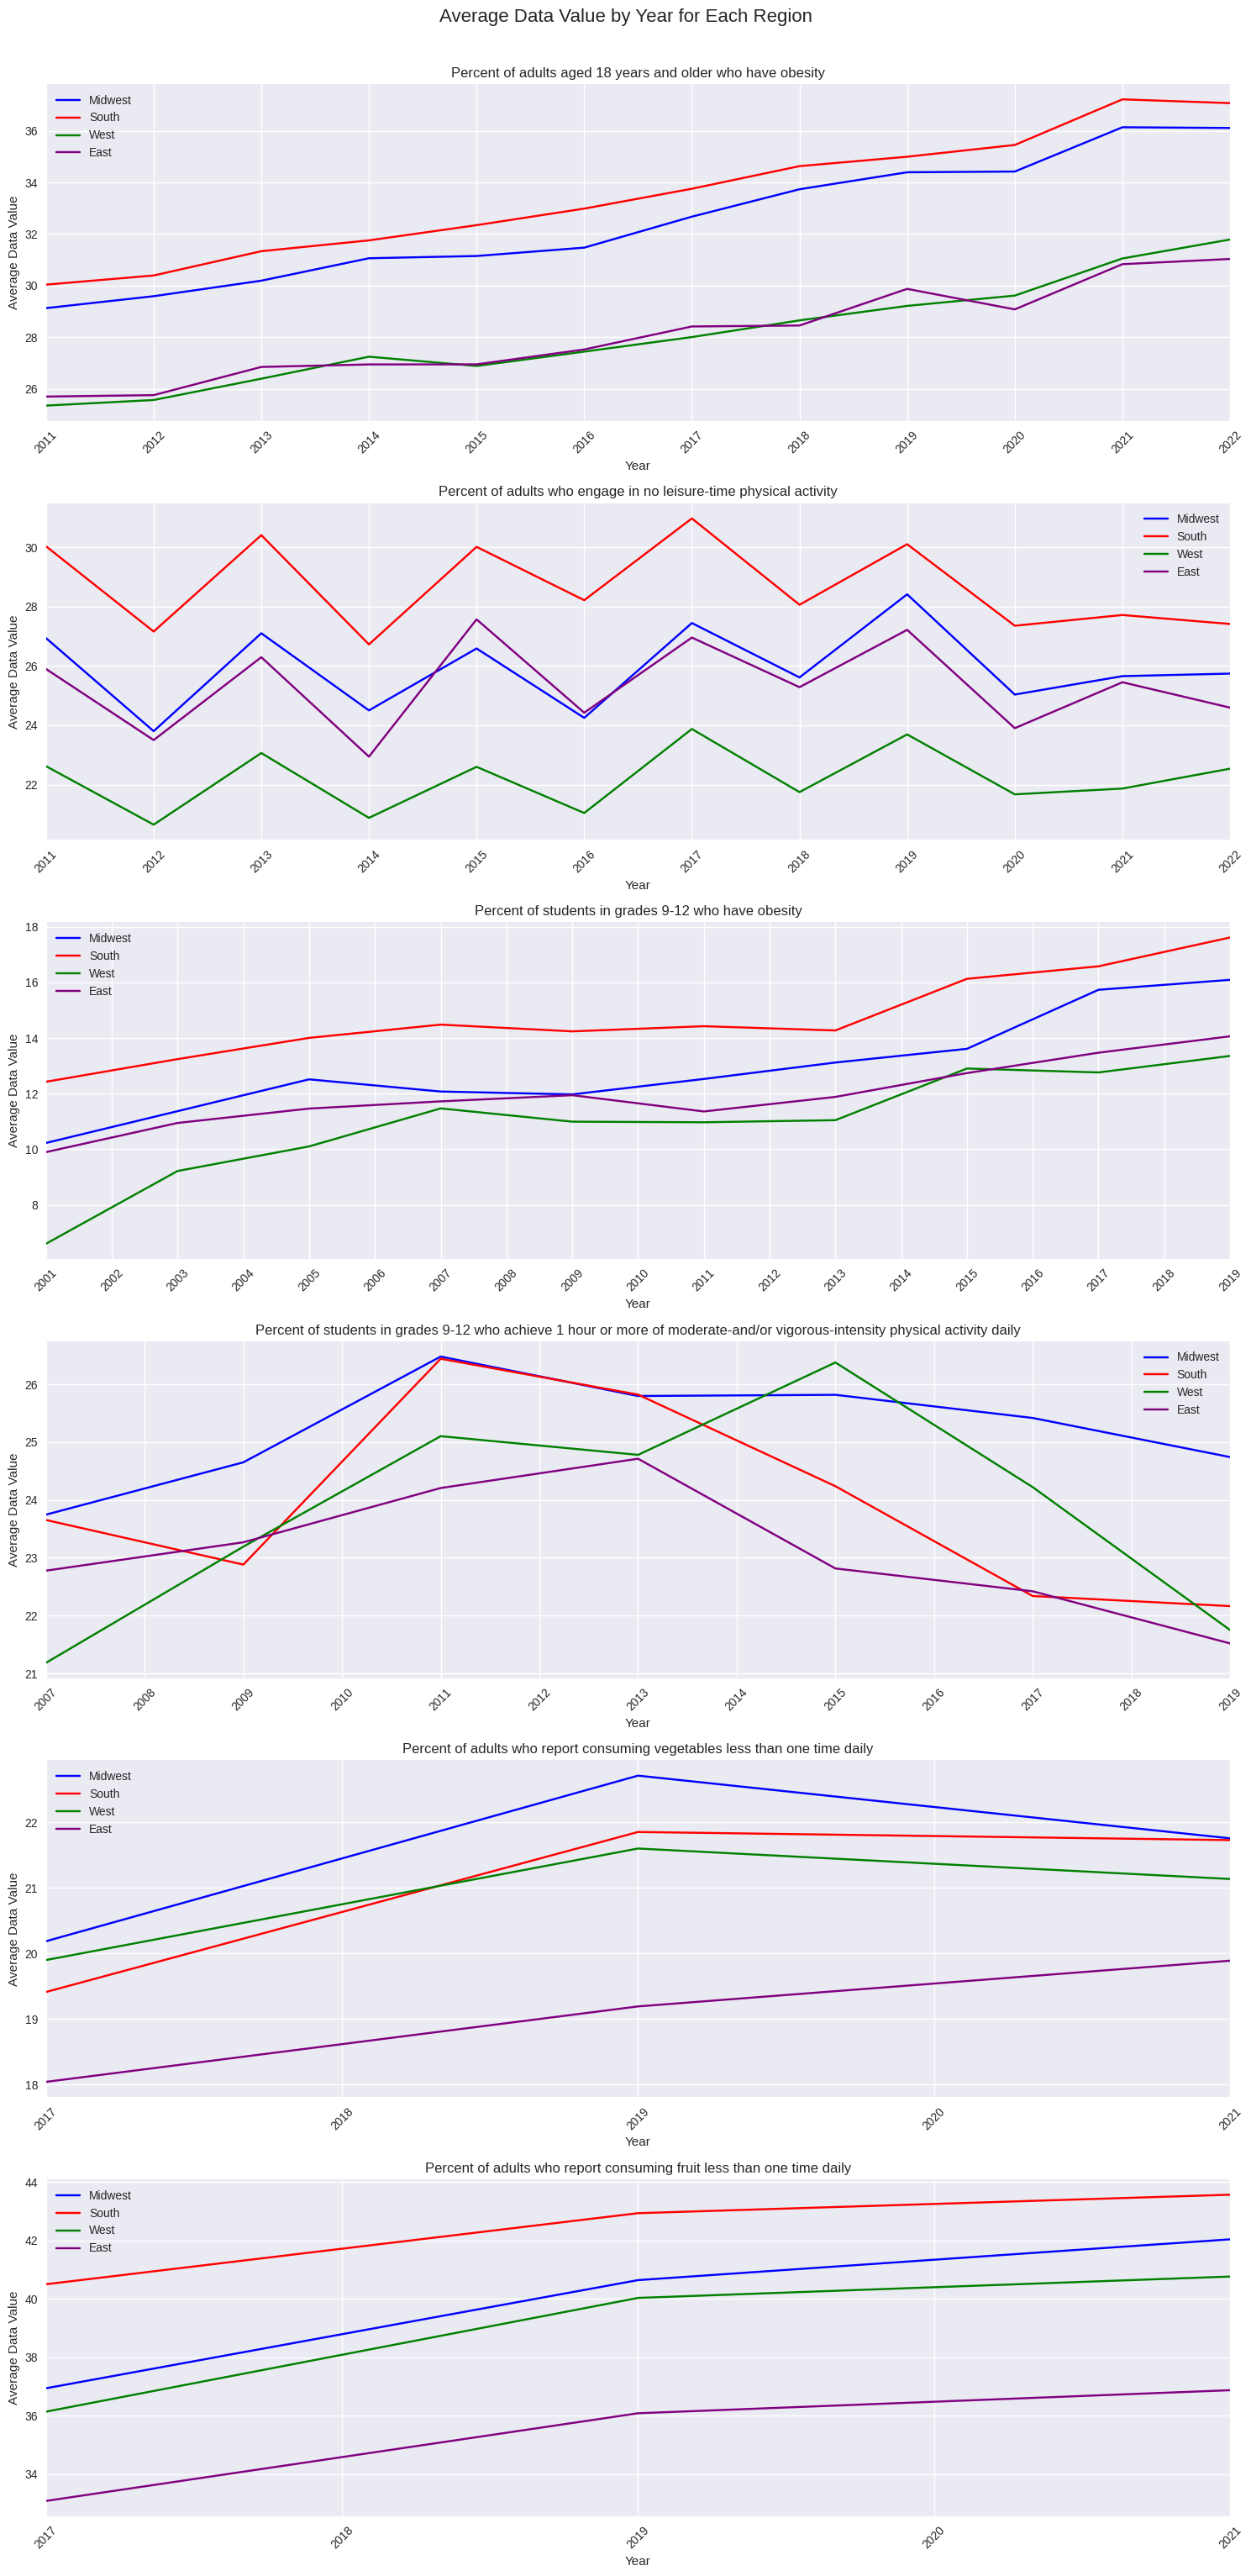

In [278]:
import matplotlib.pyplot as plt

# Set up the plot
fig, axes = plt.subplots(len(questions), 1, figsize=(15, 5*len(questions)))
fig.suptitle('Average Data Value by Year for Each Region', fontsize=16, y=1.02)

# Colors for each region
colors = {'Midwest': 'blue', 'South': 'red', 'West': 'green', 'East': 'purple'}

# Iterate through each question
for i, question in enumerate(questions):
    ax = axes[i] if len(questions) > 1 else axes
    
    min_year = float('inf')
    max_year = float('-inf')
    
    # Plot data for each region
    for region, df in regional_dfs.items():
        # Filter data for the current question
        question_data = df[df['Question'] == question]
        
        # Group by year and calculate mean
        yearly_mean = question_data.groupby('YearStart')['Data_Value'].mean()
        
        # Update min and max years
        min_year = min(min_year, yearly_mean.index.min())
        max_year = max(max_year, yearly_mean.index.max())
        
        # Plot the data
        ax.plot(yearly_mean.index, yearly_mean.values, label=region, color=colors[region])
    
    ax.set_title(question)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Data Value')
    ax.legend()
    ax.grid(True)
    
    # Set x-axis limits to show all years with data
    ax.set_xlim(min_year, max_year)
    
    # Set x-axis ticks to show all years
    ax.set_xticks(range(int(min_year), int(max_year)+1))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.99)
plt.savefig('./plots/health_data.png')
plt.show()


# STOCKS

In [279]:
stock_desc = pd.read_csv('./datasets/stock_descriptions.csv')
stocks = pd.read_csv('./datasets/all_stock_and_etfs.csv')

# Group the stocks dataframe by Ticker_Symbol
grouped_stocks = stocks.groupby('Ticker_Symbol')

# Iterate through each group
for ticker, group in grouped_stocks:
    print(f"\n{'='*50}")
    print(f"Ticker Symbol: {ticker}")
    print(f"{'='*50}")
    
    # Dataset info
    print("\nDataset Info:")
    print(group.info())
    
    # Summary statistics
    print("\nSummary Statistics:")
    print(group.describe())
    
    # Missing value count
    print("\nMissing Value Count:")
    print(group.isnull().sum())
    
    print("\n")  # Add extra newline for readability between tickers



Ticker Symbol: ADM

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6114 entries, 9501 to 15614
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date-Time      6114 non-null   object 
 1   Open           6114 non-null   float64
 2   High           6114 non-null   float64
 3   Low            6114 non-null   float64
 4   Close          6114 non-null   float64
 5   Volume         6114 non-null   int64  
 6   Ticker_Symbol  6114 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 382.1+ KB
None

Summary Statistics:
              Open         High          Low        Close        Volume
count  6114.000000  6114.000000  6114.000000  6114.000000  6.114000e+03
mean     36.548683    36.942716    36.138486    36.542313  3.821104e+06
std      18.886160    19.057984    18.697042    18.873199  2.640327e+06
min       8.438000     8.500000     8.188000     8.313000  8.265700e+04
25%      

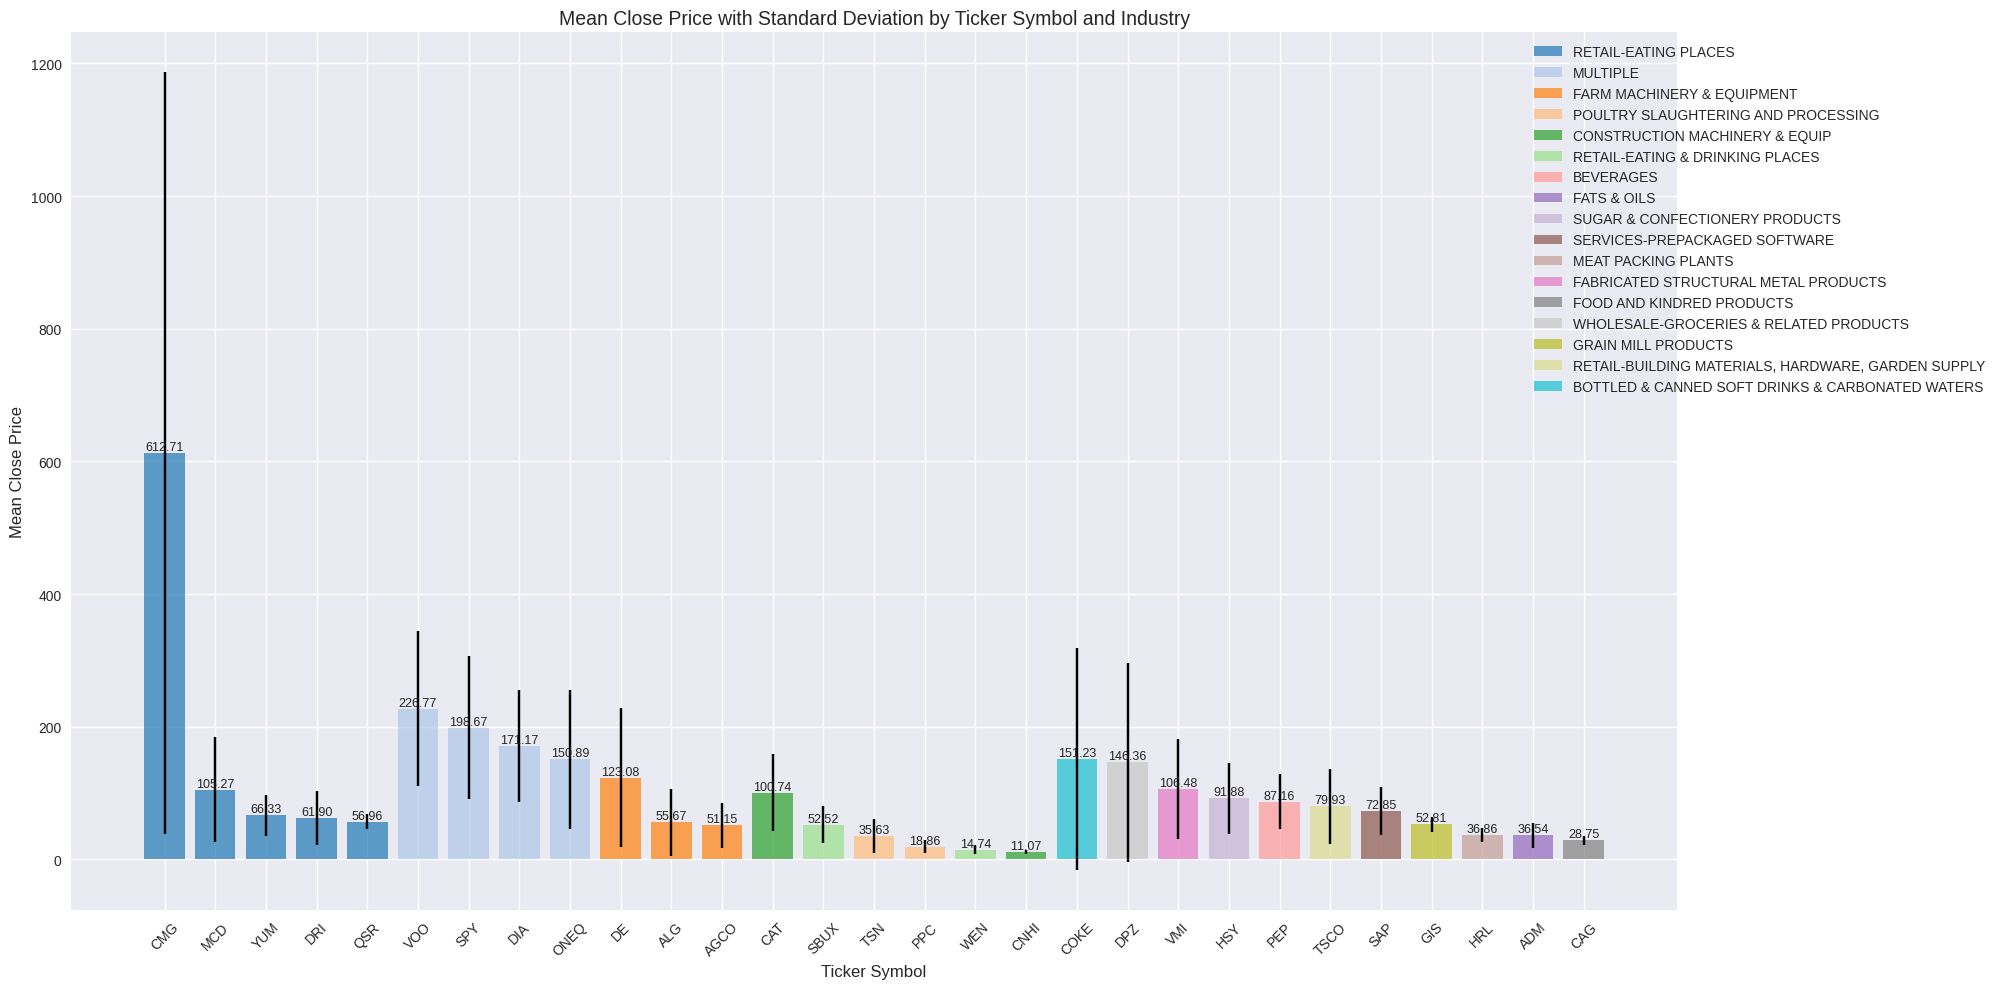

In [280]:
# Create a figure with subplots
fig, ax = plt.subplots(figsize=(20, 10))

# Lists to store data for plotting
tickers = []
means = []
stds = []
industries = []

# Iterate through each group to collect data
for ticker, group in grouped_stocks:
    tickers.append(ticker)
    means.append(group['Close'].mean())
    stds.append(group['Close'].std())
    industry = stock_desc[stock_desc['Symbol'] == ticker]['Industry'].values
    industries.append(industry[0] if len(industry) > 0 else 'Unknown')

# Convert lists to numpy arrays for easier manipulation
means = np.array(means)
stds = np.array(stds)

# Get unique industries and assign colors
unique_industries = list(set(industries))
color_map = plt.cm.get_cmap('tab20')

# Count the frequency of each industry
industry_counts = {ind: industries.count(ind) for ind in unique_industries}

# Sort industries by frequency (descending order)
sorted_industries = sorted(industry_counts.items(), key=lambda x: x[1], reverse=True)
sorted_unique_industries = [item[0] for item in sorted_industries]

# Assign colors based on the sorted order
colors = [color_map(i/len(sorted_unique_industries)) for i in range(len(sorted_unique_industries))]

# Create a list of tuples containing all the data
data = list(zip(tickers, means, stds, industries))

# Sort the data first by industry frequency, then by decreasing mean within each industry
data.sort(key=lambda x: (-industry_counts[x[3]], -x[1]))

# Unpack the sorted data
tickers, means, stds, industries = zip(*data)

# Create the bar plot with colors based on industry
bars = ax.bar(tickers, means, yerr=stds, capsize=5, alpha=0.7, 
              color=[colors[sorted_unique_industries.index(ind)] for ind in industries])

# Customize the plot
ax.set_xlabel('Ticker Symbol', fontsize=12)
ax.set_ylabel('Mean Close Price', fontsize=12)
ax.set_title('Mean Close Price with Standard Deviation by Ticker Symbol and Industry', fontsize=14)
ax.tick_params(axis='x', rotation=45)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom',
            size = 9)

# Add a legend
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=colors[i], edgecolor='none', alpha=0.7) 
                   for i in range(len(sorted_unique_industries))]
ax.legend(legend_elements, sorted_unique_industries, loc='upper right', bbox_to_anchor=(1.2, 1))

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('./plots/stock_mean_price.png')
plt.show()
plt.close()


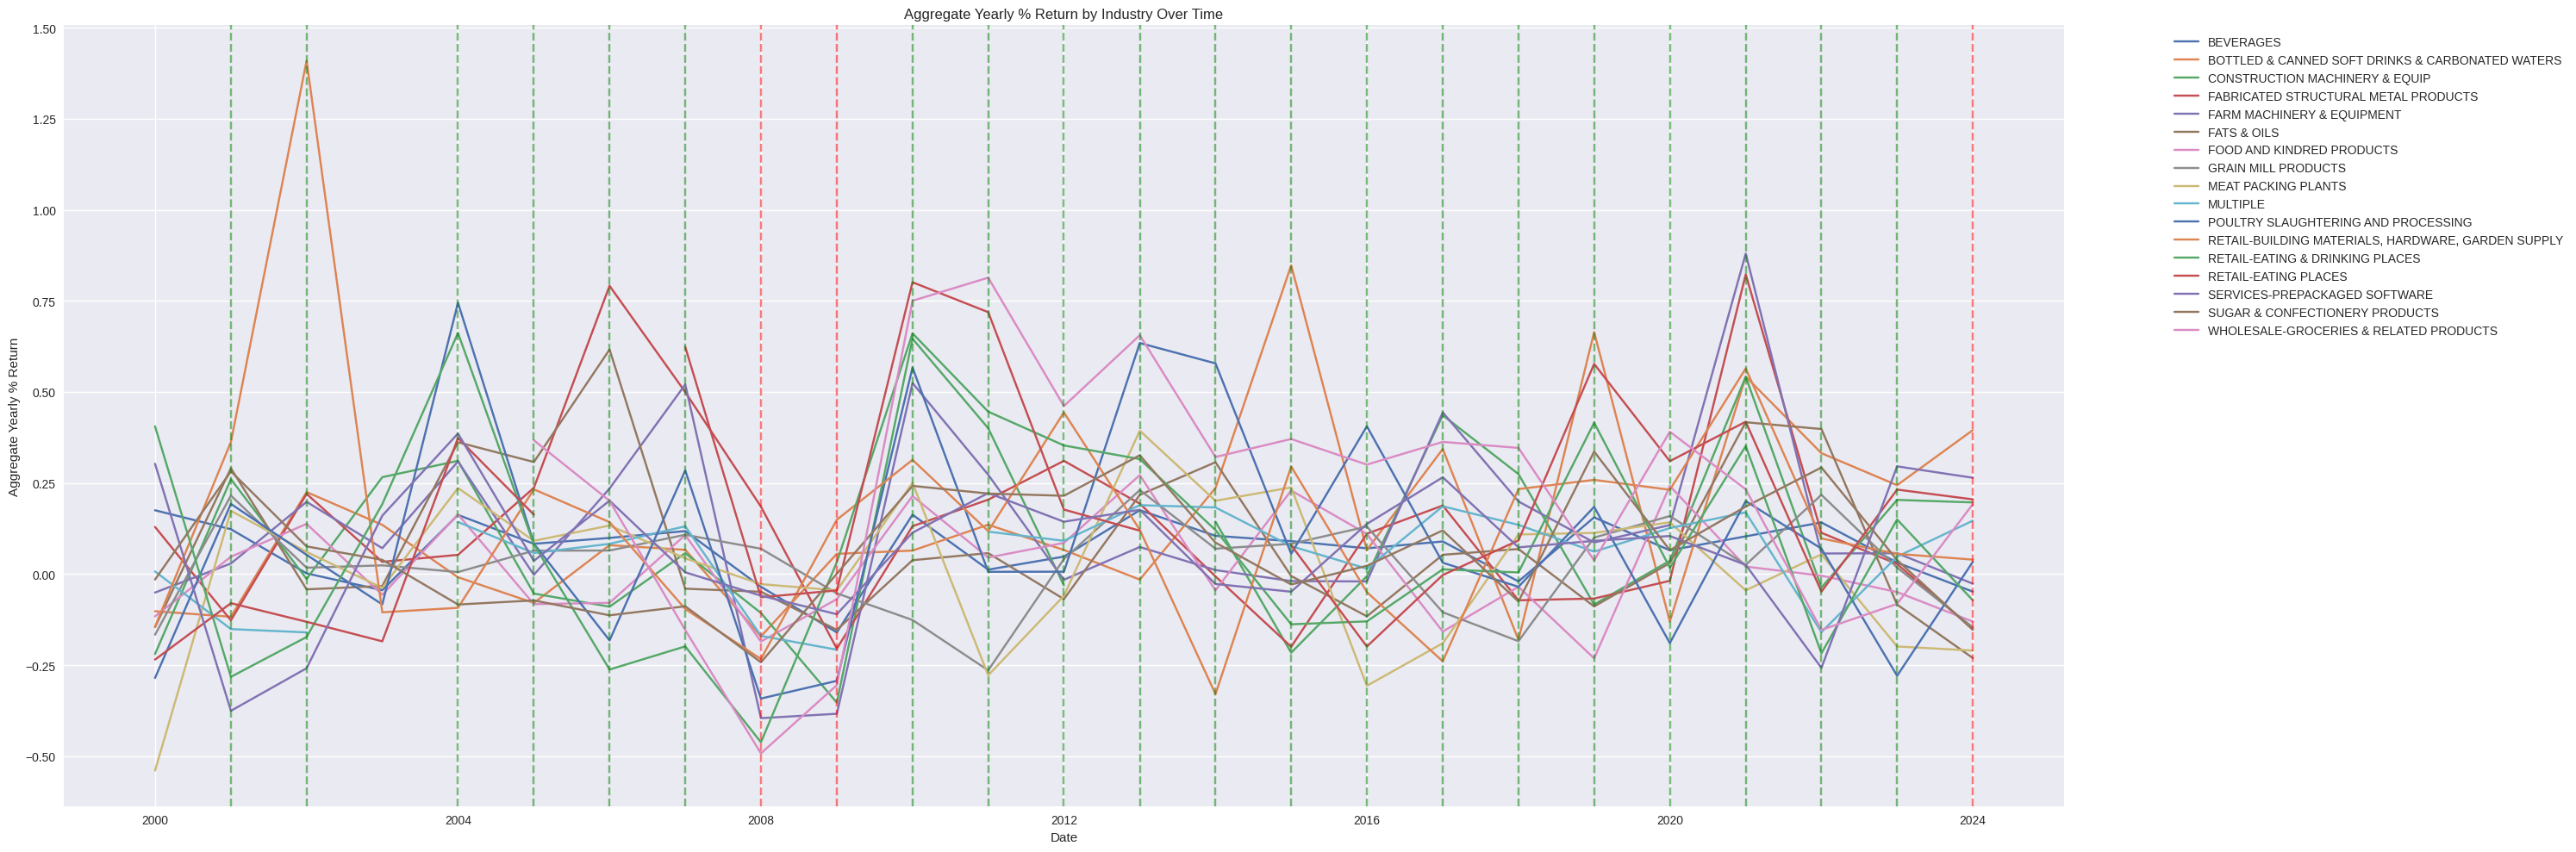

In [281]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
from scipy.signal import find_peaks

# Load the data
df = pd.read_csv('datasets/all_stock_and_etfs.csv')
df['Date-Time'] = pd.to_datetime(df['Date-Time'])

# Group by ticker and year, and calculate average closing price
yearly_avg = df.groupby([df['Ticker_Symbol'], df['Date-Time'].dt.to_period('Y')])['Close'].mean().reset_index()
yearly_avg['Date-Time'] = yearly_avg['Date-Time'].dt.to_timestamp()

# Calculate year-to-year percent change for each stock
yearly_avg['Pct_Change'] = yearly_avg.groupby('Ticker_Symbol')['Close'].pct_change()

# Calculate market cap (using the last available data for each stock)
df['Market_Cap'] = df['Close'] * df['Volume']
latest_market_cap = df.groupby('Ticker_Symbol')['Market_Cap'].last()

# Merge market cap data
yearly_avg = yearly_avg.merge(latest_market_cap, on='Ticker_Symbol')

# Load industry data
industry_df = pd.read_csv('datasets/stock_descriptions.csv')

# Merge industry data
yearly_avg = yearly_avg.merge(industry_df[['Symbol', 'Industry']], left_on='Ticker_Symbol', right_on='Symbol')

# Group by industry and date, and calculate weighted average percent change
def weighted_average(group):
    return np.average(group['Pct_Change'], weights=group['Market_Cap'])

industry_returns = yearly_avg.groupby(['Industry', 'Date-Time']).apply(weighted_average).reset_index()
industry_returns.columns = ['Industry', 'Date-Time', 'Weighted_Pct_Change']

# Calculate majority increase/decrease years
majority_years = defaultdict(lambda: {'increase': 0, 'decrease': 0, 'total': 0})
for _, row in industry_returns.iterrows():
    year = row['Date-Time'].year
    majority_years[year]['total'] += 1
    if row['Weighted_Pct_Change'] > 0:
        majority_years[year]['increase'] += 1
    else:
        majority_years[year]['decrease'] += 1

majority_increase_years = [year for year, data in majority_years.items() if data['increase'] > data['total'] / 2]
majority_decrease_years = [year for year, data in majority_years.items() if data['decrease'] > data['total'] / 2]

# Plot the results
plt.figure(figsize=(30, 10))

for industry in industry_returns['Industry'].unique():
    industry_data = industry_returns[industry_returns['Industry'] == industry]
    plt.plot(industry_data['Date-Time'], industry_data['Weighted_Pct_Change'], label=industry)

# Add vertical lines for majority increase/decrease years
for year in majority_increase_years:
    plt.axvline(x=pd.to_datetime(f"{year}-01-01"), color='green', linestyle='--', alpha=0.5)

for year in majority_decrease_years[2:]:
    plt.axvline(x=pd.to_datetime(f"{year}-01-01"), color='red', linestyle='--', alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Aggregate Yearly % Return')
plt.title('Aggregate Yearly % Return by Industry Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('./plots/industry_yearly_returns.png')
plt.show()
plt.close()


# COMMODITIES

In [282]:
commodities = pd.read_csv('./datasets/all_commodities.csv')
# Group the data by commodity
commodity_groups = commodities.groupby('Commodity')

# Iterate through each commodity group
for commodity, group in commodity_groups:
    print(f"\n{'='*50}")
    print(f"Commodity: {commodity}")
    print(f"{'='*50}")
    
    print(group.head())
    # Data info
    print("\nData Info:")
    print(group.info())
    
    # Summary statistics
    print("\nSummary Statistics:")
    print(group.describe())
    
    # Missing value info
    print("\nMissing Values:")
    print(group.isnull().sum())
    
    print("\n")



Commodity: Coffee
    Date-Time       Value             Unit Commodity
0  2024-01-01  203.879130  Cents per Pound    Coffee
1  2023-12-01  210.310476  Cents per Pound    Coffee
2  2023-11-01  197.433182  Cents per Pound    Coffee
3  2023-10-01  183.951364  Cents per Pound    Coffee
4  2023-09-01  183.589048  Cents per Pound    Coffee

Data Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 0 to 408
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date-Time  409 non-null    object 
 1   Value      409 non-null    float64
 2   Unit       409 non-null    object 
 3   Commodity  409 non-null    object 
dtypes: float64(1), object(3)
memory usage: 16.0+ KB
None

Summary Statistics:
            Value
count  409.000000
mean   138.265941
std     56.166465
min     50.830000
25%     92.019989
50%    132.518261
75%    168.612727
max    300.477143

Missing Values:
Date-Time    0
Value        0
Unit         0
Comm

/tmp/ipykernel_332510/3562354949.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_data['Date-Time'] = pd.to_datetime(coffee_data['Date-Time'])
/tmp/ipykernel_332510/3562354949.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sugar_data['Date-Time'] = pd.to_datetime(sugar_data['Date-Time'])


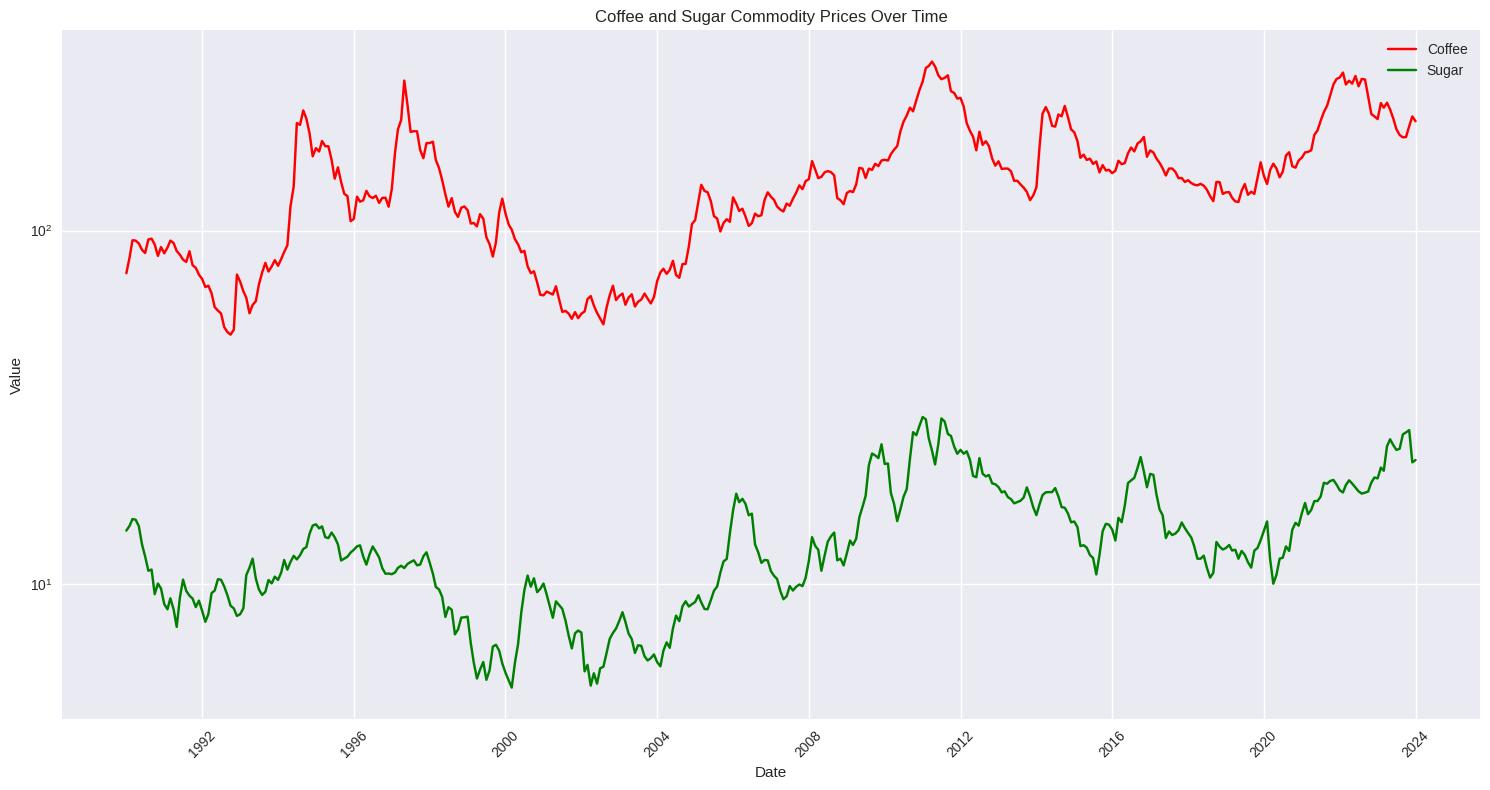

In [283]:
# Filter out the Coffee and Corn commodities
coffee_data = commodity_groups.get_group('Coffee')
sugar_data = commodity_groups.get_group('Sugar')

# Convert Date-Time to datetime
coffee_data['Date-Time'] = pd.to_datetime(coffee_data['Date-Time'])
sugar_data['Date-Time'] = pd.to_datetime(sugar_data['Date-Time'])

# Merge the two dataframes on Date-Time
merged_data = pd.merge(coffee_data, sugar_data, on='Date-Time', suffixes=('_coffee', '_sugar'))

# Drop rows with NaN values
merged_data = merged_data.dropna()

# Create the plot
plt.figure(figsize=(15, 8))

# Plot Coffee data
plt.plot(merged_data['Date-Time'], merged_data['Value_coffee'], label='Coffee', color='red')

# Plot Corn data
plt.plot(merged_data['Date-Time'], merged_data['Value_sugar'], label='Sugar', color='green')

plt.title('Coffee and Sugar Commodity Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.yscale('log')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Save the plot
plt.savefig('./plots/coffee_sugar_prices.png')

# Show the plot
plt.show()
plt.close()


# Correlations

In [286]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to get yearly average for commodities
def get_yearly_commodity_avg(commodity_data):
    commodity_data['Date-Time'] = pd.to_datetime(commodity_data['Date-Time'])
    return commodity_data[commodity_data['Date-Time'].dt.year > 2011].groupby(commodity_data['Date-Time'].dt.year)['Value'].mean()

# Get yearly averages for coffee and sugar
coffee_yearly = get_yearly_commodity_avg(coffee_data)
sugar_yearly = get_yearly_commodity_avg(sugar_data)
print("Coffee yearly:")
print(coffee_yearly.head())
print("\nSugar yearly:")
print(sugar_yearly.head())

# Get yearly averages for meat production
production_totals_df = production_totals_df.reset_index()
print("\nProduction totals:")
print(production_totals_df.head())
production_totals_df['Date'] = pd.to_datetime(production_totals_df['Date'])
meat_yearly = production_totals_df[production_totals_df['Date'].dt.year > 2011].groupby(production_totals_df['Date'].dt.year)['Production'].mean()
print("\nMeat yearly:")
print(meat_yearly.head())

# Prepare obesity and poverty data
poverty_yearly = all_regions_df[all_regions_df['Year'] > 2011].groupby('Year')['Poverty Rate'].mean()
print("\nPoverty yearly:")
print(poverty_yearly.head())
unemployment_yearly = all_regions_df[all_regions_df['Year'] > 2011].groupby('Year')['Unemployment Rate'].mean()

obesity_data = health[health['Question'].str.contains('obesity')]
obesity_yearly = obesity_data[obesity_data['YearStart'] > 2011].groupby('YearStart')['Data_Value'].mean()
print("\nObesity yearly:")
print(obesity_yearly.head())

# Combine all data
combined_data = pd.concat([coffee_yearly, sugar_yearly, meat_yearly, obesity_yearly, poverty_yearly, unemployment_yearly], axis=1)
print("\nCombined data info:")
combined_data.info()
print("\nCombined data head:")
print(combined_data.head())

# Check for mismatched indices
print("\nUnique indices in combined data:")
print(combined_data.index.unique())

# Rename columns
combined_data.columns = ['Coffee Prices', 'Sugar Prices', 'Meat Production', 'Obesity Rate', 'Poverty Rate', 'Unemployment Rate']

# Drop rows with NaN values
combined_data = combined_data.dropna()

# Calculate correlation matrix
correlation_matrix = combined_data.corr()

# Create heatmap with larger font size for annotation
plt.figure(figsize=(12, 10))  # Increased figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, 
            annot_kws={'size': 18})  # Increased font size for annotations
plt.title('Correlation Matrix of Obesity, Poverty, and Meat Production (After 2011)', fontsize=20)  # Increased title font size
plt.xticks(fontsize=14)  # Increased x-axis label font size
plt.yticks(fontsize=14)  # Increased y-axis label font size
plt.tight_layout()
plt.savefig('./plots/correlation_matrix.png', dpi=300)  # Increased DPI for better quality
plt.show()


Date-Time
2012    186.441583
2013    139.484337
2014    200.355896
2015    159.903686
2016    163.839985
Name: Value, dtype: float64
Date-Time
2012    21.374502
2013    17.708548
2014    17.127041
2015    13.215141
2016    18.143677
Name: Value, dtype: float64
        Date  Storage  Production    Counts  Weights
0 2004-01-01  1846.68     10685.1  775712.2   5105.6
1 2004-02-01  1913.53      9704.6  695684.7   5054.5
2 2004-03-01  1940.44     11187.7  823730.3   5000.9
3 2004-04-01  1983.41     10709.7  783596.9   4971.3
4 2004-05-01  2074.87     10411.3  768013.5   5000.4
Date
2012    11825.433333
2013    11835.908333
2014    11584.408333
2015    11884.450000
2016    12292.083333
Name: Production, dtype: float64
Year
2012    14.270
2013    14.692
2014    14.896
2015    14.782
2016    14.462
Name: Poverty Rate, dtype: float64
YearStart
2012    27.996622
2013    24.772000
2014    29.336158
2015    25.705792
2016    30.085817
Name: Data_Value, dtype: float64
<class 'pandas.core.frame.Data

/tmp/ipykernel_332510/2839186316.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commodity_data['Date-Time'] = pd.to_datetime(commodity_data['Date-Time'])
/tmp/ipykernel_332510/2839186316.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commodity_data['Date-Time'] = pd.to_datetime(commodity_data['Date-Time'])


ValueError: Length mismatch: Expected axis has 6 elements, new values have 4 elements